In [ ]:
import numpy as np
import pandas as pd
import torch
import scipy
from matplotlib import pyplot as plt

In [ ]:
%pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import PyDP
import pydp as dp
# Import the Bounded Mean algorithm
from pydp.algorithms.laplacian import BoundedMean

In [ ]:
%pip install scipy

import importlib.util
import sys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#example statistics: mean, median, stddev

fare_df = pd.read_csv ("yellow_cab_data.csv" , usecols= ['fare_amount'])
print(fare_df)

mean_fare = fare_df.mean()
print(mean_fare)

median_fare = fare_df.median()
print(median_fare)

std_fare = fare_df.std()
print(std_fare)

variance_fare = fare_df.var()
print(variance_fare)

        fare_amount
0             14.00
1              4.50
2              5.50
3             15.00
4             18.50
...             ...
149995        24.63
149996         9.36
149997        10.40
149998        23.71
149999         8.00

[150000 rows x 1 columns]
fare_amount    12.789388
dtype: float64
fare_amount    9.0
dtype: float64
fare_amount    12.411326
dtype: float64
fare_amount    154.041015
dtype: float64


SYNTHgauss

In [ ]:
A = fare_df.values
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

def cov_calc(A):
  print(A.shape)
  M = mean(A.T, axis=1)
  print(M)
  C = A - M
  print(C)
  V = cov(C.T)
  return(V)

X = fare_df
def synth_gauss(X):
  prng = np.random.RandomState(0)
  mean = X.mean()
  print(mean)
  cov_matrix = cov_calc(X)
  print(cov_matrix)
  (n, p) = X.shape
  noise_var = (2.0 * np.sqrt(p)) / (n * cov_matrix)
  print(noise_var)
  laplace_noise = prng.laplace(scale=noise_var, size=(p, p))
  cov_dp = cov_matrix + laplace_noise
  mu, sigma = 0, 0.1
  noise = np.random.laplace(mu, sigma, (n, p))
  X = X + noise
  synth_data = prng.multivariate_normal(mean, cov_dp, n)
  x_dp = synth_data
  return x_dp

In [ ]:
def print_statistics(x1, ogx1):
  ogx1.plot(c = "red")
  plt.plot(x1)
  plt.show()
  print(x1.mean())
  print(ogx1.mean())
  print(np.median(x1))
  print(ogx1.median())
  print(x1.std())
  print(ogx1.std())
  df = pd.DataFrame(x1, columns = ['fare_amount'])
  return df

In [ ]:
#example with tip_df
tip_df = pd.read_csv ("yellow_cab_data.csv" , usecols= ['tip_amount'])
X = tip_df
x2 = synth_gauss(X)

df1 = print_statistics(x2, tip_df)

tip_amount    2.354815
dtype: float64
(59984, 1)
tip_amount    2.354815
dtype: float64
       tip_amount
0       -2.354815
1       -0.694815
2       -0.034815
3       -2.354815
4        2.105185
...           ...
59979   -1.354815
59980    0.595185
59981   -0.354815
59982   -2.354815
59983         NaN

[59984 rows x 1 columns]
nan
nan


LinAlgError: ignored

In [ ]:
payment_type = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= ['payment_type'])
X1 = payment_type
x3 = synth_gauss(X1)
np.around(x3)
df2 = print_statistics(x3, payment_type)

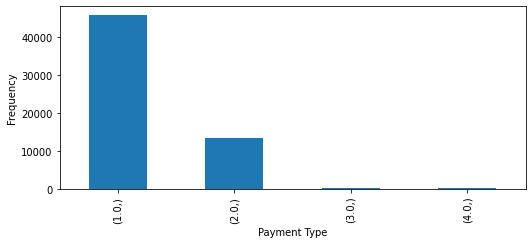

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

tempName = "payment_type"

col = pd.read_csv("yellow_cab_data.csv" , usecols= [tempName])

df = pd.DataFrame(col)
df.value_counts().plot(ax=ax , kind='bar', xlabel='Payment Type', ylabel='Frequency')

plt.show()